# House pricing

## Predict the price with linear regression

### Colaborators

- Aguirre Jasso Angel Ernesto
    - Code: 214641424
    - Career: Ingeniería en computación

- Alvarez Pantoja Itzel Madai
    - Code: 214452753 
    - Career: Ingeniería en computación
    
- Hernandez Chavez David 
    - Code: 216188646 
    - Career: Ingeniería informática

### About the course

 - Name: Mineria de datos
 - Section: D04
 - Calendar: 2022A
 - Teacher: Guzman Montes Carlos Alberto
 

# Univariate analysis

We're going to analyze the attributes to get more information

In [56]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
# load dataset by using pandas

df = pd.read_csv('houses.csv', encoding='ISO-8859-1')

# Show data types


df.dtypes

C:\Users\angel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

## Before exploring the data, we have to chage dtypes in order to get good statistics

In [58]:
df['livingRoom'] = df['livingRoom'].apply(pd.to_numeric, errors='coerce')
df['drawingRoom'] = df['drawingRoom'].apply(pd.to_numeric, errors='coerce')
df['bathRoom'] = df['bathRoom'].apply(pd.to_numeric, errors='coerce')
df['constructionTime'] = df['constructionTime'].apply(pd.to_numeric, errors='coerce')
df['floor'] = df['floor'].apply(lambda x: x.split()[1] if len(x.split()) == 2 else 1)

df['tradeTime'] = df['tradeTime'].apply(pd.to_datetime, errors='coerce')

df = df.astype({
    'buildingType': 'object',
    'renovationCondition': 'object',
    'elevator': 'object',
    'subway': 'object',
    'Cid': 'object',
    'fiveYearsProperty': 'object',
    'district': 'object',  
    'buildingStructure': 'object',
    'floor': 'int32',
    'tradeTime': 'datetime64'
})

df['tradeTime'] = df['tradeTime'].dt.year.astype('int32')

## Univariate analysis in numceric attributes

### Status of the dataset

In [4]:
from funpymodeling.exploratory import status
from funpymodeling.exploratory import profiling_num

In [5]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,url,0,0.000000,0,0.000000,318851,object
1,id,0,0.000000,0,0.000000,318851,object
2,Lng,0,0.000000,0,0.000000,3995,float64
3,Lat,0,0.000000,0,0.000000,3993,float64
4,Cid,0,0.000000,0,0.000000,4035,object
5,tradeTime,0,0.000000,0,0.000000,13,int32
6,DOM,157977,0.495457,0,0.000000,551,float64
7,followers,0,0.000000,83487,0.261837,547,int64
8,totalPrice,0,0.000000,0,0.000000,5780,float64
9,price,0,0.000000,0,0.000000,80042,int64


In [6]:
column = 'tradeTime'
df[column]

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
318846    2016
318847    2016
318848    2016
318849    2016
318850    2016
Name: tradeTime, Length: 318851, dtype: int32

In [7]:
df[column].describe()

count    318851.000000
mean       2014.783943
std           1.656591
min        2002.000000
25%        2013.000000
50%        2015.000000
75%        2016.000000
max        2018.000000
Name: tradeTime, dtype: float64

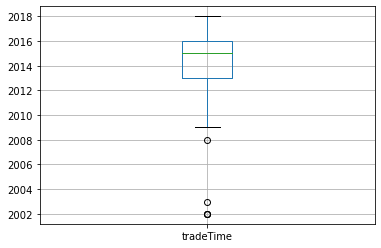

In [8]:
df.boxplot(column=column)
plt.show()

## Univariate analysis in categorical attributes

In [9]:
column = 'district'
df[column].describe()

count     318851
unique        13
top            7
freq      107244
Name: district, dtype: int64

In [10]:
df[column].value_counts()

7     107244
6      38634
8      38200
10     31293
2      29338
1      17086
4      15313
11     13974
9      11371
13      9202
5       2955
3       2537
12      1704
Name: district, dtype: int64

<BarContainer object of 13 artists>

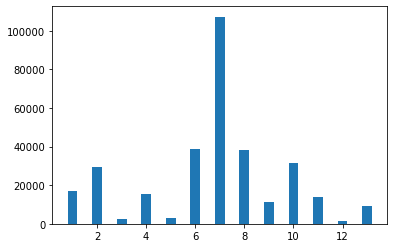

In [11]:
plt.bar(df[column].value_counts().index, df[column].value_counts(), width = 0.4)

## Missing values

In [59]:
df = df.drop(['url', 'id', 'Cid'], axis = 1)

df.isnull().sum()

Lng                         0
Lat                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                 32
drawingRoom                32
kitchen                     0
bathRoom                    2
floor                       0
buildingType             2021
constructionTime        19283
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

## Correlation

In [13]:
df_corr = df.corr(method = 'spearman')
df_corr

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,ladderRatio,communityAverage
Lng,1.000000,-0.001279,-0.027361,-0.012940,-0.013789,-0.080398,-0.139274,0.069746,-0.020236,0.068418,0.044492,0.062011,0.059433,0.089402,0.038140,-0.148923
Lat,-0.001279,1.000000,-0.006205,0.021807,0.004671,0.071039,-0.020276,0.129763,0.099256,0.061304,-0.001016,0.094332,-0.108336,-0.018892,0.109565,-0.030579
tradeTime,-0.027361,-0.006205,1.000000,0.685318,0.660810,0.502106,0.569398,-0.009719,0.006699,-0.070043,0.015141,-0.003091,0.015714,0.055369,0.003283,-0.023903
DOM,-0.012940,0.021807,0.685318,1.000000,0.605888,0.414057,0.453444,0.015105,0.023117,-0.031896,0.036801,0.019158,0.016913,0.047690,-0.003597,0.001456
followers,-0.013789,0.004671,0.660810,0.605888,1.000000,0.349400,0.425034,-0.036714,0.011706,-0.060100,0.031383,-0.038164,-0.013688,-0.018704,-0.027957,0.023688
totalPrice,-0.080398,0.071039,0.502106,0.414057,0.349400,1.000000,0.707188,0.488526,0.431431,0.321471,0.084847,0.350186,0.175120,0.107001,0.142890,0.445588
price,-0.139274,-0.020276,0.569398,0.453444,0.425034,0.707188,1.000000,-0.217538,-0.081607,-0.136033,0.030710,-0.094784,0.067853,-0.173033,-0.142995,0.690785
square,0.069746,0.129763,-0.009719,0.015105,-0.036714,0.488526,-0.217538,1.000000,0.715530,0.629841,0.073790,0.598835,0.182485,0.401203,0.392588,-0.224901
livingRoom,-0.020236,0.099256,0.006699,0.023117,0.011706,0.431431,-0.081607,0.715530,1.000000,0.477607,0.094860,0.508486,-0.106564,-0.024798,0.349854,-0.080334
drawingRoom,0.068418,0.061304,-0.070043,-0.031896,-0.060100,0.321471,-0.136033,0.629841,0.477607,1.000000,0.122160,0.540395,0.038578,0.213237,0.340094,-0.101456


<AxesSubplot:>

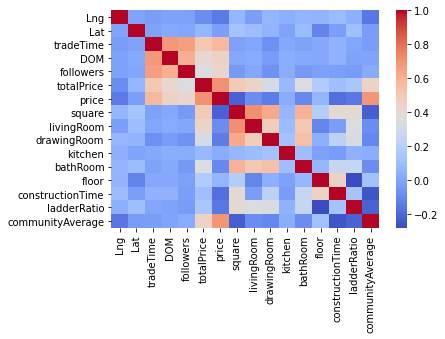

In [14]:
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, cmap = 'coolwarm')

## Outliers detection

In [60]:
def location_outliers(column, show = True):
    
    # Quartile 1
    q1 = df[column].quantile(0.25)

    # Quartile 2
    q3 = df[column].quantile(0.75)

    # Interquartile value

    iqr = q3 - q1

    median = df[column].median()
    
    min_value = df[column].min()
    max_value = df[column].max()


    # Lower quartile

    lq = (q1 - 1.5 * iqr)

    # Uppper quartile

    uq = (q3 + 1.5 * iqr)
    
    if(show):
        print('Quartile 1: ', q1)
        print('Quartile 2: ', q3)
        print('Interquartile: ', iqr)
        print('Median: ', median)
        print('Minimum value: ', min_value)
        print('Maximum value: ', max_value)
        print('Lower quartile: ', lq)
        print('Upper quartile: ', uq)

    mapping = (df[column] < lq) | (df[column] > uq)
    
    return mapping
    
mapping =  location_outliers('Lng')   

lo = df[mapping]

lo


Quartile 1:  116.344985
Quartile 2:  116.477581
Interquartile:  0.1325960000000066
Median:  116.41678
Minimum value:  116.072514
Maximum value:  116.732378
Lower quartile:  116.14609099999998
Upper quartile:  116.67647500000001


,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
49,116.683117,40.127185,2016,530.0,61,470.0,32879,142.95,3.0,2.0,...,4.0,2004.0,4,2,0.500,1.0,1.0,0.0,13,37937.0
93,116.679737,40.219508,2016,519.0,13,798.0,26600,300.00,4.0,2.0,...,NaN,2013.0,1,6,0.500,1.0,0.0,0.0,13,27425.0
118,116.117019,39.933860,2016,455.0,114,153.0,24252,63.09,2.0,1.0,...,4.0,1990.0,4,2,0.333,0.0,1.0,0.0,12,39381.0
121,116.122354,39.937384,2016,424.0,80,251.5,25464,98.77,3.0,1.0,...,4.0,2001.0,3,2,0.500,0.0,1.0,0.0,12,36358.0
122,116.117724,39.941152,2016,484.0,32,460.0,27480,167.40,4.0,2.0,...,4.0,2005.0,4,2,0.500,0.0,0.0,0.0,12,39492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294434,116.689803,39.889508,2016,NaN,18,174.0,33507,51.93,1.0,1.0,...,4.0,2001.0,3,4,0.333,0.0,0.0,0.0,11,42490.0
294435,116.692569,39.896787,2016,NaN,6,146.0,26440,55.22,1.0,1.0,...,4.0,2011.0,4,6,0.500,1.0,1.0,0.0,11,32515.0
294437,116.700632,39.914747,2016,NaN,16,567.0,45115,125.68,3.0,2.0,...,4.0,2005.0,4,2,0.500,0.0,1.0,0.0,11,54191.0
294443,116.692569,39.896787,2016,NaN,7,150.0,27165,55.22,1.0,1.0,...,4.0,2011.0,4,6,0.500,1.0,1.0,0.0,11,32515.0


## Values outside the domain.

In [16]:
# Categorical attributes

df[~df.subway.isin([0,1])]

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
92235,116.117724,39.941152,2010,1.0,0,198.0,15729,125.89,NaN,NaN,...,0.5,1.0,0,0,0.0,NaN,NaN,NaN,12,39492.0
92251,116.121964,39.939762,2010,1.0,0,136.0,14601,93.15,NaN,NaN,...,0.333,1.0,0,0,0.0,NaN,NaN,NaN,12,37588.0
92267,116.118409,39.937888,2010,1.0,0,127.0,14613,86.91,NaN,NaN,...,0.333,1.0,0,0,0.0,NaN,NaN,NaN,12,38753.0
92270,116.111318,39.949921,2010,1.0,0,115.0,14240,80.76,NaN,NaN,...,0.5,0.0,0,0,0.0,NaN,NaN,NaN,12,36923.0
92297,116.117724,39.941152,2010,1.0,0,100.0,17242,58.00,NaN,NaN,...,0.125,1.0,0,0,0.0,NaN,NaN,NaN,12,39492.0
92299,116.111318,39.949921,2010,1.0,0,205.0,13021,157.44,NaN,NaN,...,0.5,0.0,0,0,0.0,NaN,NaN,NaN,12,36923.0
92300,116.118409,39.937888,2010,1.0,0,146.5,15985,91.65,NaN,NaN,...,0.5,1.0,0,0,0.0,NaN,NaN,NaN,12,38753.0
92304,116.117019,39.933860,2010,1.0,0,90.0,14288,62.99,NaN,NaN,...,0.333,0.0,0,0,0.0,NaN,NaN,NaN,12,39381.0
92340,116.122354,39.937384,2010,1.0,0,130.0,17640,73.70,NaN,NaN,...,0.5,0.0,0,0,0.0,NaN,NaN,NaN,12,36358.0
92349,116.117724,39.941152,2010,1.0,0,109.5,17484,62.63,NaN,NaN,...,0.125,1.0,0,0,0.0,NaN,NaN,NaN,12,39492.0


In [61]:
# Numeric attributes

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

status(df.select_dtypes(include = numerics))

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Lng,0,0.000000,0,0.000000,3995,float64
1,Lat,0,0.000000,0,0.000000,3993,float64
2,tradeTime,0,0.000000,0,0.000000,13,int32
3,DOM,157977,0.495457,0,0.000000,551,float64
4,followers,0,0.000000,83487,0.261837,547,int64
5,totalPrice,0,0.000000,0,0.000000,5780,float64
6,price,0,0.000000,0,0.000000,80042,int64
7,square,0,0.000000,0,0.000000,18298,float64
8,livingRoom,32,0.000100,28,0.000088,10,float64
9,drawingRoom,32,0.000100,19686,0.061740,6,float64


## Delete attributes

In [ ]:
df = df.drop(['price', 'DOM', 'followers', 'fiveYearsProperty'], axis = 1)

In [66]:
len(df)

318851

## Delete outliers

In [67]:
columns = ['Lng', 'Lat', 'totalPrice', 'square', 'floor',  'constructionTime', 'ladderRatio', 'tradeTime']

for c in columns:
    lo = location_outliers(c, show = False)
    df = df[~lo]


In [68]:
len(df)

275554

## Delete missing values

In [69]:
df = df.dropna()
df.isnull().sum()

Lng                    0
Lat                    0
tradeTime              0
totalPrice             0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
subway                 0
district               0
communityAverage       0
dtype: int64

In [70]:
len(df)

258413

## Fake predictors

In [71]:
df_corr = df.corr(method = 'spearman')

<AxesSubplot:>

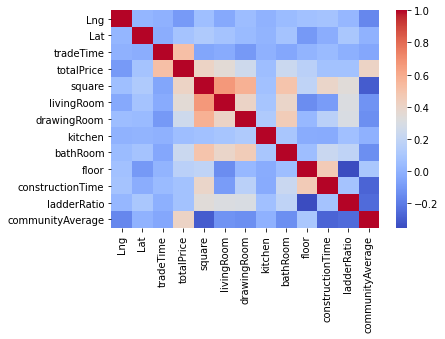

In [72]:
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, cmap = 'coolwarm')

## Normalize numeric attributes

In [73]:
from sklearn.preprocessing import MinMaxScaler

df

,Lng,Lat,tradeTime,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,communityAverage
0,116.475489,40.019520,2016,415.0,131.00,2.0,1.0,1,1.0,26,1.0,2005.0,3,6,0.217,1.0,1.0,7,56021.0
1,116.453917,39.881534,2016,575.0,132.38,2.0,2.0,1,2.0,22,1.0,2004.0,4,6,0.667,1.0,0.0,7,71539.0
3,116.438010,40.076114,2016,297.5,134.00,3.0,1.0,1,1.0,21,1.0,2008.0,1,6,0.273,1.0,0.0,6,51238.0
5,116.466280,39.991363,2016,275.6,53.00,1.0,0.0,1,1.0,8,4.0,2005.0,3,6,0.333,1.0,0.0,7,67738.0
6,116.482586,39.891991,2016,275.0,73.00,2.0,1.0,1,1.0,6,4.0,1997.0,4,2,0.500,0.0,0.0,7,50112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318843,116.530566,39.827437,2016,182.0,62.88,1.0,1.0,1,1.0,6,4.0,2003.0,1,2,0.333,0.0,0.0,4,44396.0
318844,116.550348,39.755625,2016,268.0,118.02,2.0,2.0,1,2.0,5,4.0,2006.0,4,6,0.500,0.0,0.0,3,33518.0
318845,116.546899,39.755236,2016,355.5,134.20,3.0,2.0,1,2.0,9,3.0,2009.0,4,6,0.500,1.0,0.0,3,36545.0
318847,116.497474,39.810115,2016,108.8,35.09,1.0,0.0,1,1.0,24,1.0,2009.0,1,6,0.222,1.0,1.0,3,54282.0


In [74]:
numeric_attr = df.describe().columns.drop('totalPrice')

scaler = MinMaxScaler();

scaled_df = df.copy()

scaled_df[numeric_attr] = scaler.fit_transform(scaled_df[numeric_attr])

scaled_df

,Lng,Lat,tradeTime,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,communityAverage
0,0.620414,0.659698,0.777778,415.0,0.852890,0.285714,0.25,0.333333,0.142857,0.694444,1.0,0.731707,3,6,0.237150,1.0,1.0,7,0.262240
1,0.579601,0.349564,0.777778,575.0,0.862444,0.285714,0.50,0.333333,0.285714,0.583333,1.0,0.707317,4,6,0.762850,1.0,0.0,7,0.352324
3,0.549505,0.786898,0.777778,297.5,0.873659,0.428571,0.25,0.333333,0.142857,0.555556,1.0,0.804878,1,6,0.302570,1.0,0.0,6,0.234474
5,0.602991,0.596413,0.777778,275.6,0.312911,0.142857,0.00,0.333333,0.142857,0.194444,4.0,0.731707,3,6,0.372664,1.0,0.0,7,0.330259
6,0.633842,0.373067,0.777778,275.0,0.451367,0.285714,0.25,0.333333,0.142857,0.138889,4.0,0.536585,4,2,0.567757,0.0,0.0,7,0.227938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318843,0.724618,0.227977,0.777778,182.0,0.381308,0.142857,0.25,0.333333,0.142857,0.138889,4.0,0.682927,1,2,0.372664,0.0,0.0,4,0.194756
318844,0.762045,0.066573,0.777778,268.0,0.763032,0.285714,0.50,0.333333,0.285714,0.111111,4.0,0.756098,4,6,0.567757,0.0,0.0,3,0.131608
318845,0.755520,0.065699,0.777778,355.5,0.875043,0.428571,0.50,0.333333,0.285714,0.222222,3.0,0.829268,4,6,0.567757,1.0,0.0,3,0.149180
318847,0.662009,0.189044,0.777778,108.8,0.188924,0.142857,0.00,0.333333,0.142857,0.638889,1.0,0.829268,1,6,0.242991,1.0,1.0,3,0.252145


## Categorical attributes to numerical

In [75]:
data = scaled_df.copy()

data = pd.get_dummies(data)
data

,Lng,Lat,tradeTime,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,0.620414,0.659698,0.777778,415.0,0.852890,0.285714,0.25,0.333333,0.142857,0.694444,...,0,0,0,1,0,0,0,0,0,0
1,0.579601,0.349564,0.777778,575.0,0.862444,0.285714,0.50,0.333333,0.285714,0.583333,...,0,0,0,1,0,0,0,0,0,0
3,0.549505,0.786898,0.777778,297.5,0.873659,0.428571,0.25,0.333333,0.142857,0.555556,...,0,0,1,0,0,0,0,0,0,0
5,0.602991,0.596413,0.777778,275.6,0.312911,0.142857,0.00,0.333333,0.142857,0.194444,...,0,0,0,1,0,0,0,0,0,0
6,0.633842,0.373067,0.777778,275.0,0.451367,0.285714,0.25,0.333333,0.142857,0.138889,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318843,0.724618,0.227977,0.777778,182.0,0.381308,0.142857,0.25,0.333333,0.142857,0.138889,...,1,0,0,0,0,0,0,0,0,0
318844,0.762045,0.066573,0.777778,268.0,0.763032,0.285714,0.50,0.333333,0.285714,0.111111,...,0,0,0,0,0,0,0,0,0,0
318845,0.755520,0.065699,0.777778,355.5,0.875043,0.428571,0.50,0.333333,0.285714,0.222222,...,0,0,0,0,0,0,0,0,0,0
318847,0.662009,0.189044,0.777778,108.8,0.188924,0.142857,0.00,0.333333,0.142857,0.638889,...,0,0,0,0,0,0,0,0,0,0


In [80]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Lng,0,0.0,31,0.000120,3296,float64
1,Lat,0,0.0,207,0.000801,3294,float64
2,tradeTime,0,0.0,1,0.000004,10,float64
3,totalPrice,0,0.0,0,0.000000,4301,float64
4,square,0,0.0,1,0.000004,12142,float64
5,livingRoom,0,0.0,16,0.000062,8,float64
6,drawingRoom,0,0.0,16035,0.062052,5,float64
7,kitchen,0,0.0,1337,0.005174,4,float64
8,bathRoom,0,0.0,534,0.002066,6,float64
9,floor,0,0.0,34,0.000132,36,float64


## Numerical attributres to categorical

In [85]:
data[numeric_attr] = data[numeric_attr].astype('category')
data['totalPrice'] = data['totalPrice'].astype('category')
data.dtypes

Lng                      category
Lat                      category
tradeTime                category
totalPrice               category
square                   category
livingRoom               category
drawingRoom              category
kitchen                  category
bathRoom                 category
floor                    category
constructionTime         category
ladderRatio              category
communityAverage         category
buildingType_1.0            uint8
buildingType_2.0            uint8
buildingType_3.0            uint8
buildingType_4.0            uint8
renovationCondition_1       uint8
renovationCondition_2       uint8
renovationCondition_3       uint8
renovationCondition_4       uint8
buildingStructure_1         uint8
buildingStructure_2         uint8
buildingStructure_3         uint8
buildingStructure_4         uint8
buildingStructure_5         uint8
buildingStructure_6         uint8
elevator_0.0                uint8
elevator_1.0                uint8
subway_0.0    

In [84]:
data

,Lng,Lat,tradeTime,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,0.620414,0.659698,0.777778,415.0,0.852890,0.285714,0.25,0.333333,0.142857,0.694444,...,0,0,0,1,0,0,0,0,0,0
1,0.579601,0.349564,0.777778,575.0,0.862444,0.285714,0.50,0.333333,0.285714,0.583333,...,0,0,0,1,0,0,0,0,0,0
3,0.549505,0.786898,0.777778,297.5,0.873659,0.428571,0.25,0.333333,0.142857,0.555556,...,0,0,1,0,0,0,0,0,0,0
5,0.602991,0.596413,0.777778,275.6,0.312911,0.142857,0.00,0.333333,0.142857,0.194444,...,0,0,0,1,0,0,0,0,0,0
6,0.633842,0.373067,0.777778,275.0,0.451367,0.285714,0.25,0.333333,0.142857,0.138889,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318843,0.724618,0.227977,0.777778,182.0,0.381308,0.142857,0.25,0.333333,0.142857,0.138889,...,1,0,0,0,0,0,0,0,0,0
318844,0.762045,0.066573,0.777778,268.0,0.763032,0.285714,0.50,0.333333,0.285714,0.111111,...,0,0,0,0,0,0,0,0,0,0
318845,0.755520,0.065699,0.777778,355.5,0.875043,0.428571,0.50,0.333333,0.285714,0.222222,...,0,0,0,0,0,0,0,0,0,0
318847,0.662009,0.189044,0.777778,108.8,0.188924,0.142857,0.00,0.333333,0.142857,0.638889,...,0,0,0,0,0,0,0,0,0,0


## Modeling

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import time

In [107]:
x = data.drop(columns = 'totalPrice')
y = data['totalPrice']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state=69)

xtrain

,Lng,Lat,tradeTime,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
297370,0.442634,0.392940,0.333333,0.308550,0.142857,0.25,0.333333,0.142857,0.500000,0.731707,...,0,0,0,0,0,0,1,0,0,0
270431,0.090073,0.463721,0.333333,0.546764,0.428571,0.25,0.333333,0.142857,0.138889,0.536585,...,0,0,0,0,0,1,0,0,0,0
193857,0.862609,0.435271,0.777778,0.568017,0.285714,0.25,0.333333,0.142857,0.638889,0.560976,...,0,0,0,1,0,0,0,0,0,0
2357,0.611040,0.581901,0.777778,0.933264,0.428571,0.50,0.333333,0.285714,0.638889,0.634146,...,0,0,0,1,0,0,0,0,0,0
226068,0.529893,0.329556,0.444444,0.488335,0.428571,0.25,0.333333,0.142857,0.472222,0.365854,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173980,0.857998,0.731183,0.777778,0.279958,0.142857,0.50,0.333333,0.142857,0.138889,0.341463,...,0,0,0,1,0,0,0,0,0,0
316539,0.436984,0.345377,0.777778,0.596331,0.285714,0.25,0.333333,0.142857,0.472222,0.658537,...,0,0,0,0,0,0,1,0,0,0
243927,0.387343,0.756135,0.333333,0.476220,0.285714,0.25,0.333333,0.142857,0.527778,0.585366,...,0,0,0,0,1,0,0,0,0,0
152172,0.880136,0.402319,0.555556,0.330772,0.142857,0.25,0.333333,0.142857,0.583333,0.731707,...,0,0,0,1,0,0,0,0,0,0


In [127]:
model_ridge = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias =
    False)),
    ("regressor", Ridge(alpha = 0.03))
])

start = time.time()
model_ridge.fit(xtrain, ytrain)
stop = time.time()

print('Train (Ridge): ', model_ridge.score(xtrain, ytrain))
print('Test: (Ridge): ', model_ridge.score(xtest, ytest))
print(f"Training time: {stop - start}s")

Train (Ridge):  0.866550460028688
Test: (Ridge):  0.865131589655661
Training time: 33.81099605560303s


In [102]:
model_lasso = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias =
    False)),
    ("regressor", Lasso(alpha = 0.03))
])
    
start = time.time()
model_lasso.fit(xtrain, ytrain)
stop = time.time()

print('Train (Lasso): ', model_lasso.score(xtrain, ytrain))
print('Test: (Lasso): ', model_lasso.score(xtest, ytest))
print(f"Training time: {stop - start}s")

C:\Users\angel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1024097.422846973, tolerance: 384158.2540941986
  model = cd_fast.enet_coordinate_descent(


Train (Lasso):  0.8594278062712536
Test: (Lasso):  0.8592990978154353
Training time: 526.1559681892395s


In [105]:
model_elasticNet = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias =
    False)),
    ("regressor", ElasticNet(alpha = 0.03))
])

start = time.time()
model_elasticNet.fit(xtrain, ytrain)
stop = time.time()

print('Train (ElasticNet): ', model_elasticNet.score(xtrain, ytrain))
print('Test: (ElasticNet): ', model_elasticNet.score(xtest, ytest))
print(f"Training time: {stop - start}s")

C:\Users\angel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146372414.97418028, tolerance: 384158.2540941986
  model = cd_fast.enet_coordinate_descent(


Train (ElasticNet):  0.7990046962102924
Test: (ElasticNet):  0.7995322267391163
Training time: 922.6915190219879s


## Predict

In [134]:
xpred = data.sample()

xpred

,Lng,Lat,tradeTime,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
160143,0.624372,0.51185,0.555556,296.0,0.468674,0.428571,0.25,0.333333,0.142857,0.472222,...,0,0,0,1,0,0,0,0,0,0


In [135]:
model_ridge.predict(xpred.drop(columns = 'totalPrice'))

array([255.80566689])